## Visualize Textdata
SB10k Korpus + One Million Posts Korpus

In [102]:
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

## million pos Korpus

In [83]:
file_path_corpus = "../labeled_sentiment_data/million_pos_corpus.tsv"
million_pos_corpus = pd.read_csv(file_path_corpus, sep='\t', names = ["Sentiment","Content"])

In [84]:
million_pos_corpus.head()

,Sentiment,Content
0,neutral,Top qualifizierte Leute verdienen auch viel.
1,negative,"Gott sei dank ist für sie eine Umfrage alles, ..."
2,neutral,"Sorry, aber die FPÖ tut eigentlich gar nichts ..."
3,negative,Weil es dein meisten Leuten verständlicherweis...
4,neutral,Na wer weis was da vorgefallen ist...


In [85]:
len(million_pos_corpus)

3440

## sb10k Twitter Korpus

In [86]:
file_path_corpus = "../labeled_sentiment_data/sb10k_corpus.tsv"
tweet_corpus = pd.read_csv(file_path_corpus, sep='\t', names = ["Tweet ID", "Sentiment", "ID", "ID2","Content"])

In [87]:
tweet_corpus.head()

,Tweet ID,Sentiment,ID,ID2,Content
0,385497381925847040,positive,16d4ea17feedebbc87d8ddf3f57c172b,[],RT @TheKedosZone: So ein Hearthstone-Key von @...
1,364483696570945536,neutral,a6416685aa01bb28315ec81baa50639d,[],Not Available
2,373606425379225600,positive,e9f93f030ab466d8aa624d1bfb33d31b,[],Not Available
3,367189542857482240,neutral,c020aa23ff1f8ff985ce489b2b678674,[],Tainted Talents (Ateliertagebuch.) » Wir sind ...
4,368327046574776321,neutral,0096b66e311fffcca65c23d2a310083b,[],Aber wenigstens kommt #Supernatural heute mal ...


In [88]:
tweet_corpus = tweet_corpus[tweet_corpus["Content"] != "Not Available"]

In [89]:
len(tweet_corpus)

7095

## Wort-Visualisierung

### Wort-Wolke

In [117]:
from wordcloud import WordCloud

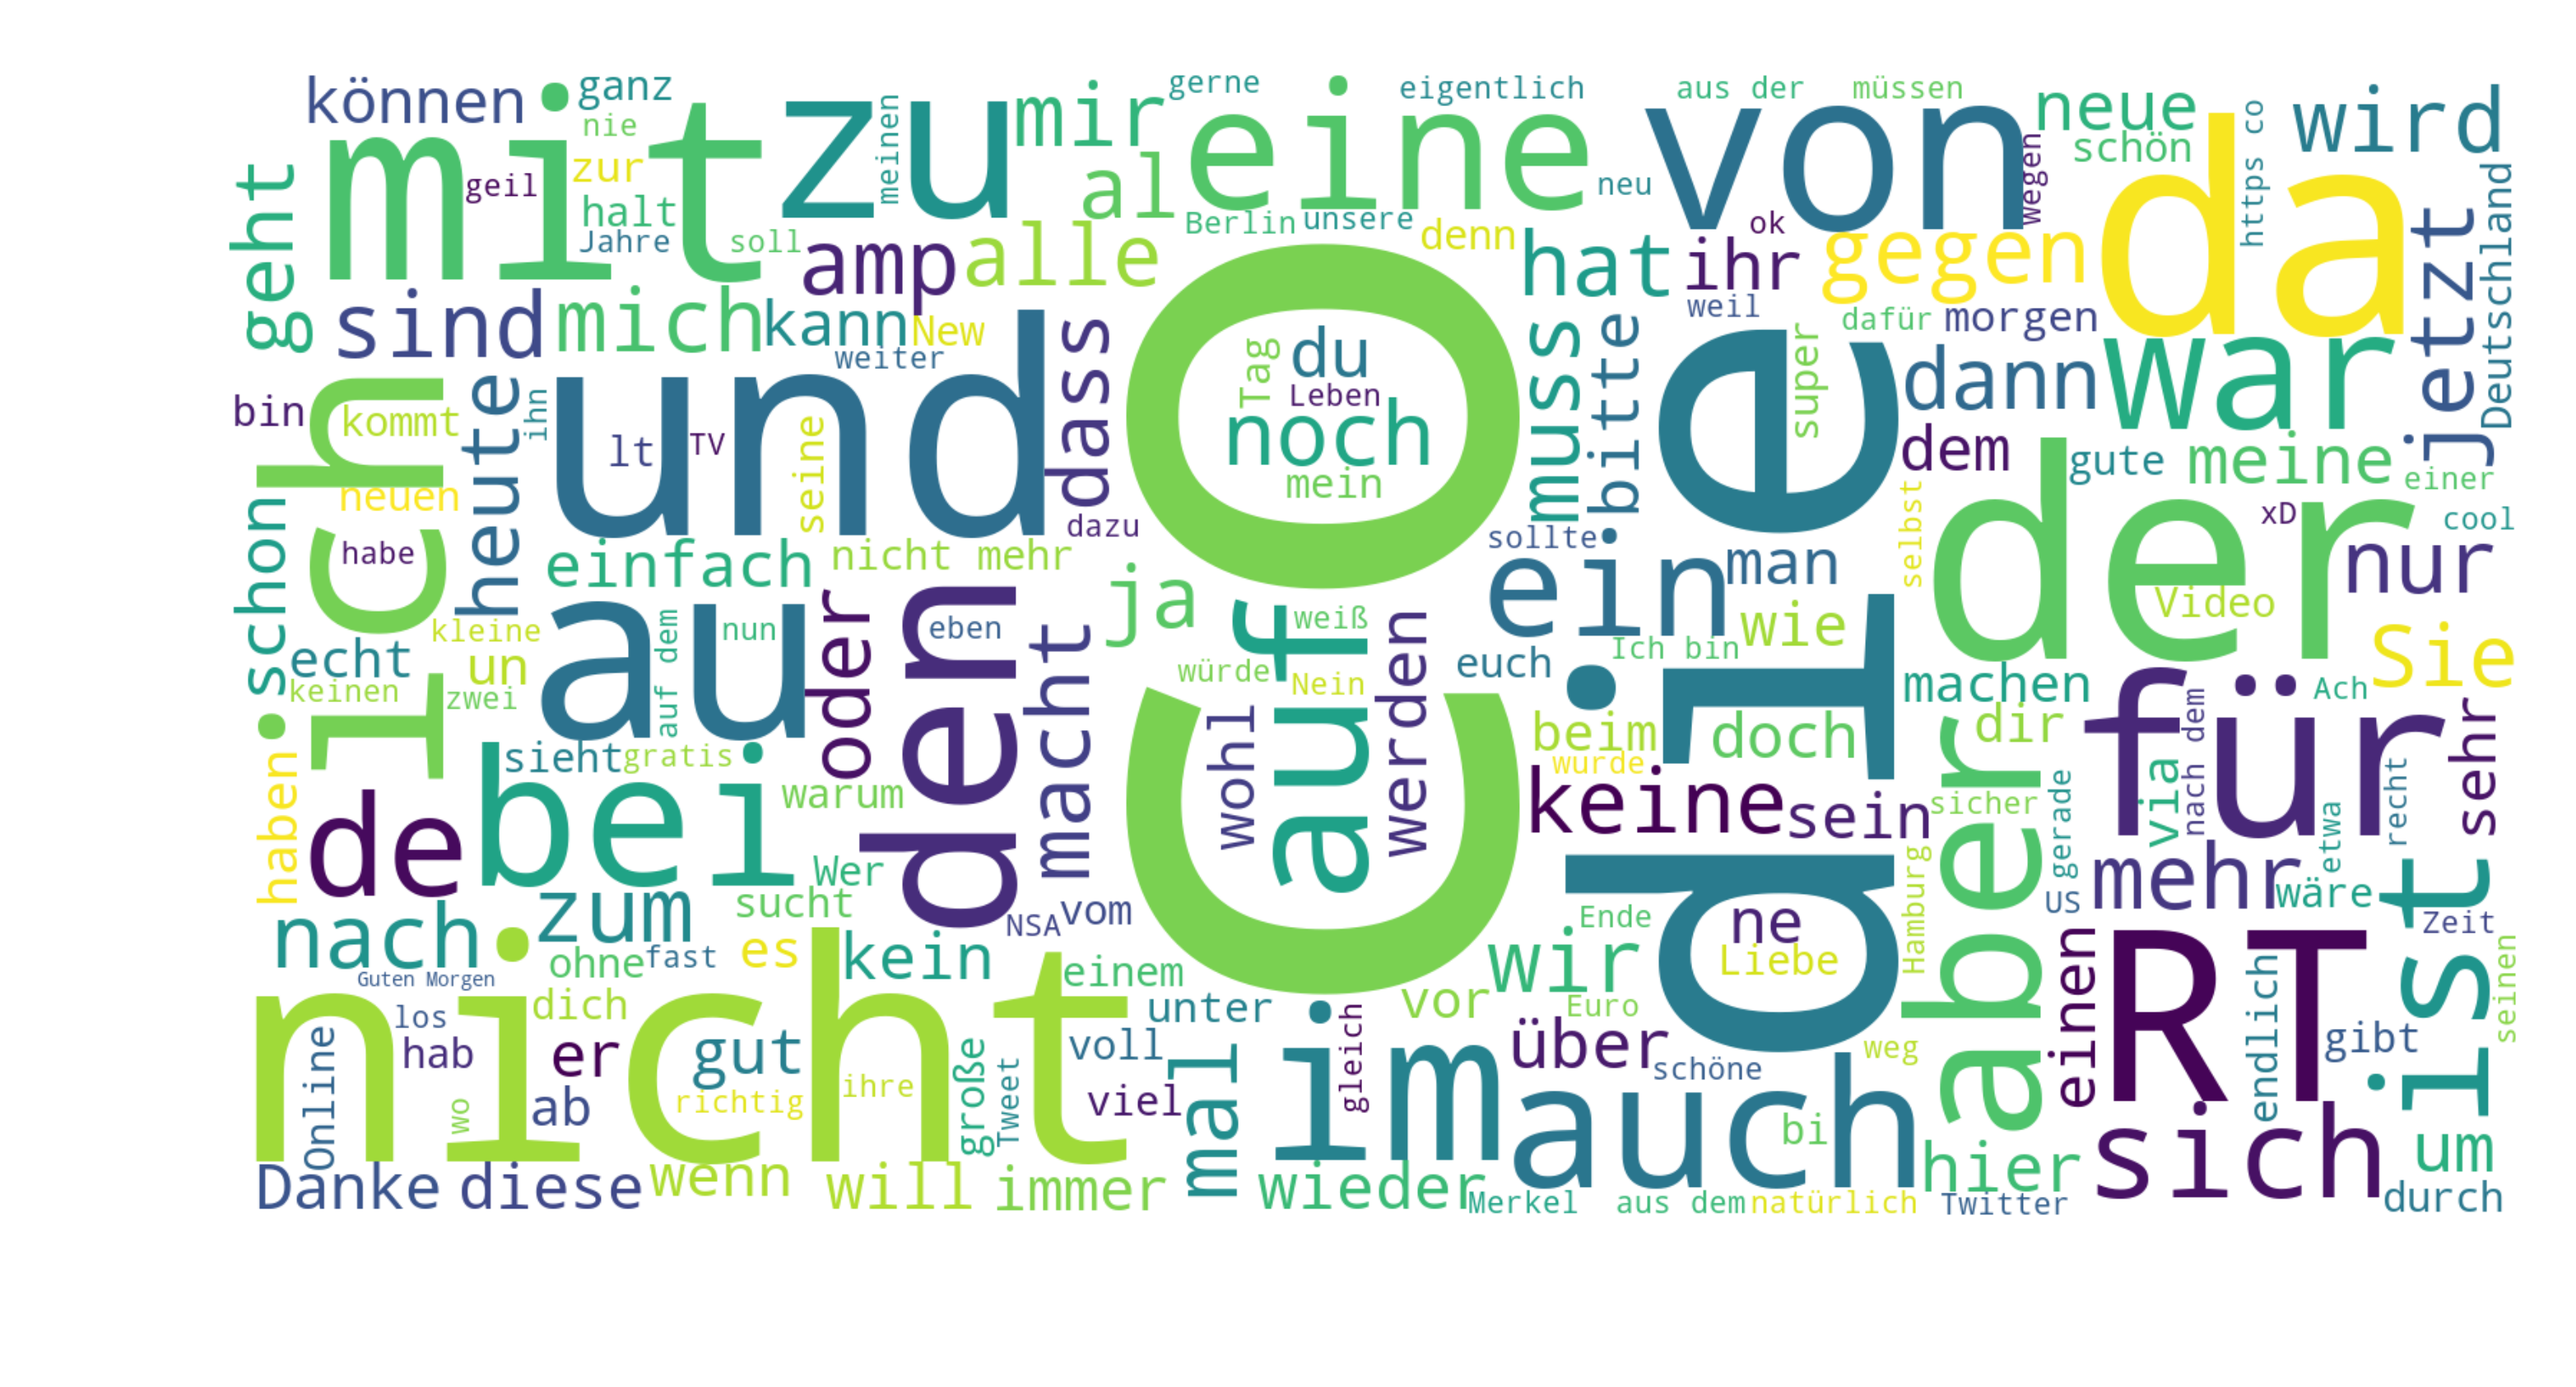

In [118]:
textstring = ""
wordlist = list()
wordlist = tweet_corpus["Content"][:] #million_pos_corpus
# wordlist
for txt in wordlist:
    if(type(txt) == str):
        for word in txt:
            if(type(word) == str):
                textstring = textstring + word

wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(textstring)
# plt.figure()
plt.figure(dpi=600)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('words.png')

### Positive und Negative Wörter visualisieren

In [104]:
from textblob_de import TextBlobDE as TextBlob
from tqdm import tqdm
import pickle
import seaborn as sns

In [105]:
def read_lexicon(lexicon_file):
    sentiment_words = []

    for line_id, line in enumerate(open(lexicon_file, "r", encoding="utf-8").readlines()):
        try:
            columns = line.rstrip().split("\t")
            sentiment_words.append(columns[0])
        except Exception:
            print("\nWrong format in line:{} in file:{}".format(
                line_id, lexicon_file))
            raise Exception
    return sentiment_words

In [108]:
neg_words = read_lexicon("../sentiment_lexicons/negative_words.tsv")

In [109]:
pos_words = read_lexicon("../sentiment_lexicons/positive_words.tsv")

In [111]:
data = pickle.load(open("../labeled_sentiment_data/pickle_files/sb10k_and_one_million_posts_corpus/X_clean_data_stopwords.pickle", "rb"))
len(data)

10535

In [112]:
textstring = ""
for txt in tqdm(data):
    for word in txt:
        if(word in neg_words):
            textstring = textstring + " " + word

100%|███████████████████████████████████████████████████████████████████████████| 10535/10535 [00:52<00:00, 200.09it/s]


In [113]:
blob = TextBlob(textstring)
neg_words_dic = blob.word_counts

In [114]:
df = pd.DataFrame.from_dict(neg_words_dic, orient='index')
df = df.reset_index()
df.columns = ['negatives Wort', 'absolute Häufigkeit']
df = df.sort_values(by=['absolute Häufigkeit'],ascending=False)
df = df[0:15]

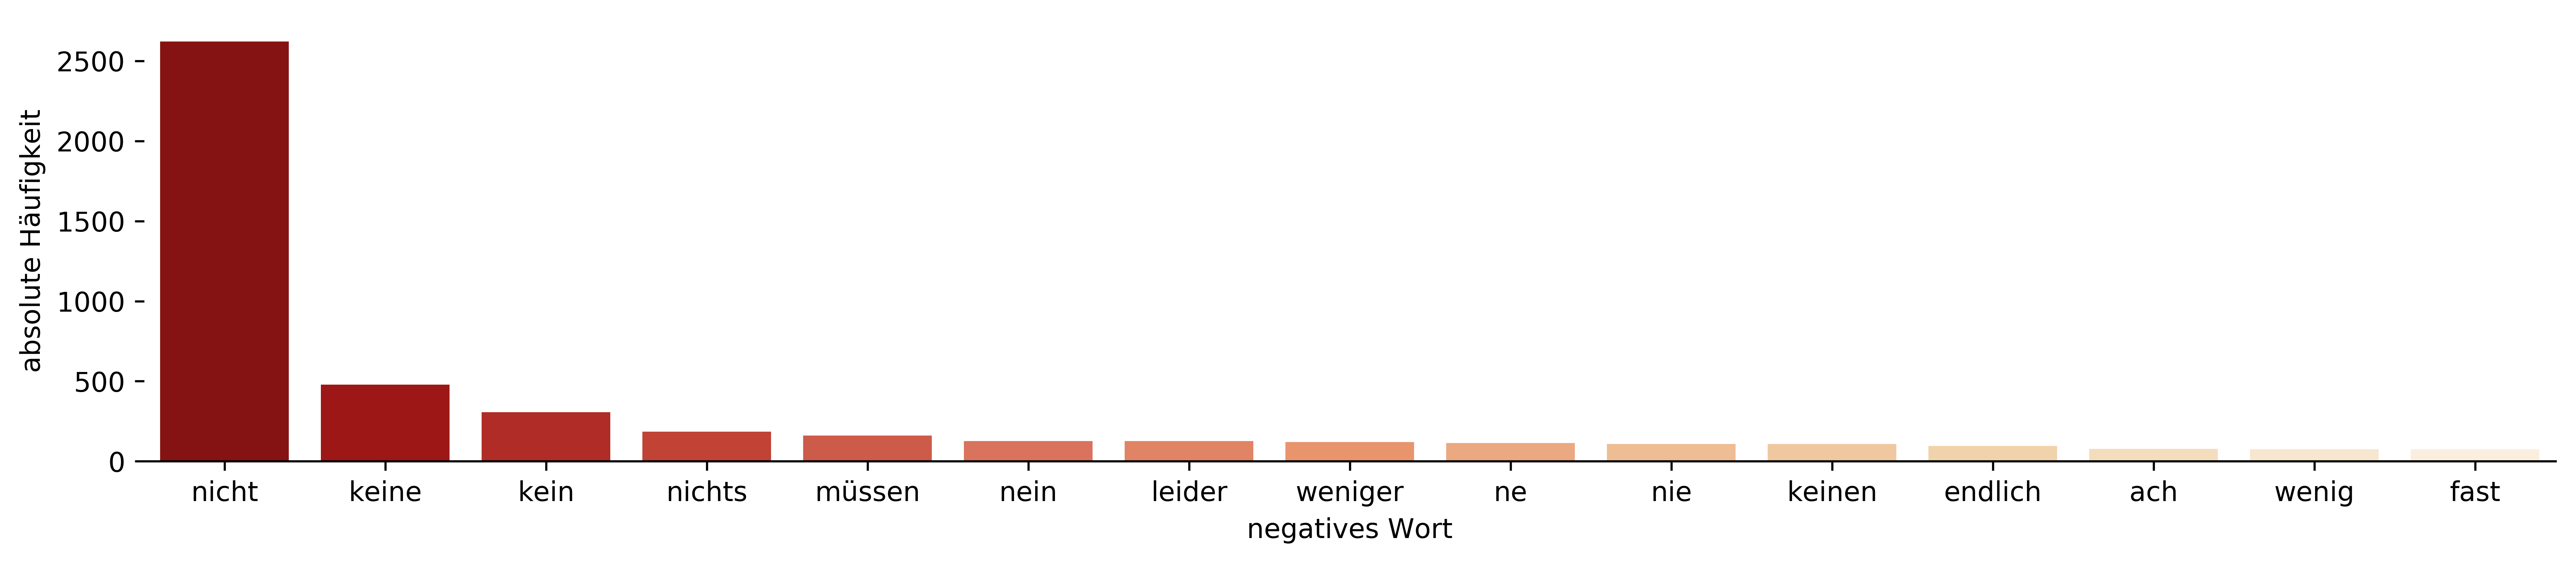

In [116]:
plt.figure(figsize=(16,3), dpi=600)
sns.barplot(x="negatives Wort", y="absolute Häufigkeit", data=df,palette='OrRd_r') #color="#d9dbd9"
sns.despine(left=True) #Rahmen entfernen
plt.savefig('neg_words.png')